# GUC K-nearest neighbor Classification

### Import packages and data set
#### Import the "Classified data" file 

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
#from sklearn.model_selection import split

from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
import pandas  as  pd
import seaborn as sns 
import  matplotlib.pyplot as  plt 
import numpy  as  np #matplotlib inline 
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix


### Scale the features using sklearn.preprocessing package

**Instantiate a scaler standardizing estimator**

**Fit the features data only to this estimator (leaving the TARGET CLASS column) and transform**

In [11]:
my_data=pd.read_csv('Classified Data')#

scaler = StandardScaler()

#scaler.fit(csv_file)
#StandardScaler.fit(csv_file)

#data=scaler.transform(csv_file)
scaler.fit(my_data.drop('TARGET CLASS',axis=1)) 
scaled_features = scaler.transform(csv_file.drop('TARGET CLASS',axis=1))
scaled_features = pd.DataFrame(scaled_features,columns=csv_file.columns[:-1])
scaled_features.head()


,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-1.730320,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.726856,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-1.723391,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,-1.719927,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,-1.716463,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


### Train/Test split, model fit and prediction

In [12]:
X = scaled_features 
y = my_data['TARGET CLASS'] 
X_train, X_test, y_train, y_test = train_test_split(scaled_features,csv_file['TARGET CLASS'],               
                                                    test_size=0.6, random_state=101) 

X_cv, X_test_new=np.split(X_test, 2)
Y_cv , Y_test_new=np.split(y_test, 2)

In [13]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print (confusion_matrix(y_test, pred))


print(knn.score(X_test, y_test))

[[279  14]
 [ 23 284]]
0.9383333333333334


### Evaluation of classification quality using Confusion Matrix

In [16]:
error=[]
k_range=99
for i in range(1, k_range):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_cv)
    error.append(np.mean(pred_i != Y_cv))



***Print Misclassification error rate***

Text(0, 0.5, 'Mean Error')

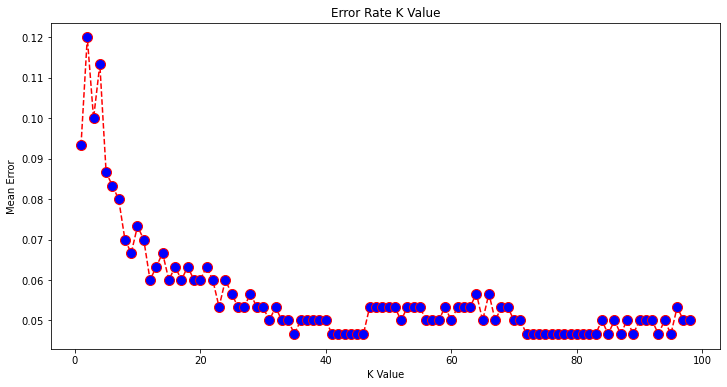

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, k_range), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

# Choosing 'k' using cross validation error
#### Plot the error rate vs. K Value